In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
dpi = 50

workdir = '/Users/diana/Dropbox/UW/Research/rasm/rasm_project_meeting_oct2016/rasm_data_atm'

import data

In [2]:
image = xr.open_dataset(os.path.join(workdir, 'imagemode_rasmri_historyfiles',
                                            'vic5.RI.test.20170310a.cpl.hi.1948-09-01-10800.nc'))
rasm11_output = xr.open_dataset(os.path.join(workdir, 'imagemode_rasmri_historyfiles',
                                             'fluxes_rasmri_3hourly.nc'))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

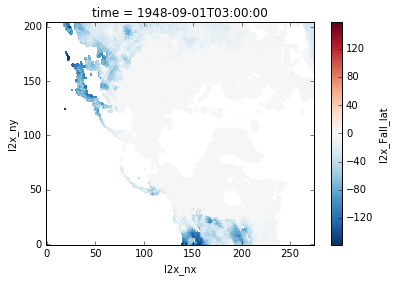

In [14]:
image.l2x_Fall_lat.plot()

In [10]:
image

<xarray.Dataset>
Dimensions:            (a2x_nx: 275, a2x_ny: 205, doma_nx: 275, doma_ny: 205, doml_nx: 275, doml_ny: 205, fraca_nx: 275, fraca_ny: 205, fracl_nx: 275, fracl_ny: 205, l2x_nx: 275, l2x_ny: 205, time: 1, x2a_nx: 275, x2a_ny: 205, x2l_nx: 275, x2l_ny: 205)
Coordinates:
  * time               (time) datetime64[ns] 1948-09-01T03:00:00
Dimensions without coordinates: a2x_nx, a2x_ny, doma_nx, doma_ny, doml_nx, doml_ny, fraca_nx, fraca_ny, fracl_nx, fracl_ny, l2x_nx, l2x_ny, x2a_nx, x2a_ny, x2l_nx, x2l_ny
Data variables:
    doma_lat           (time, doma_ny, doma_nx) float64 16.53 16.78 17.02 ...
    doma_lon           (time, doma_ny, doma_nx) float64 189.2 189.4 189.6 ...
    doma_area          (time, doma_ny, doma_nx) float64 2.579e-05 2.594e-05 ...
    doma_aream         (time, doma_ny, doma_nx) float64 2.579e-05 2.594e-05 ...
    doma_mask          (time, doma_ny, doma_nx) float64 1.0 1.0 1.0 1.0 1.0 ...
    doma_frac          (time, doma_ny, doma_nx) float64 1.0 1.0 1.0 1

saved figure for OUT_LATENT
saved figure for OUT_SENSIBLE
saved figure for OUT_PREC
saved figure for OUT_EVAP
saved figure for OUT_AIR_TEMP
saved figure for OUT_WIND
saved figure for OUT_QAIR
saved figure for OUT_PRESSURE
saved figure for OUT_LWDOWN
saved figure for OUT_ALBEDO
saved figure for OUT_AERO_RESIST
saved figure for OUT_AERO_RESIST1


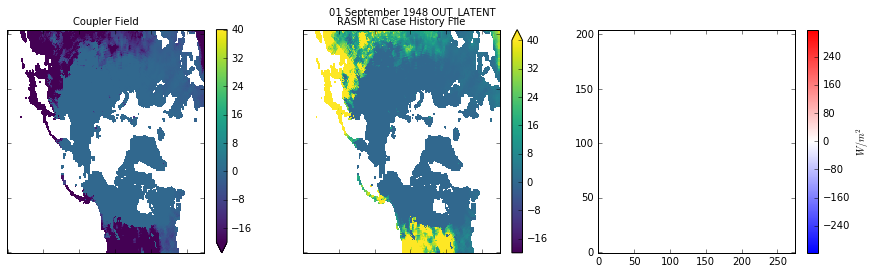

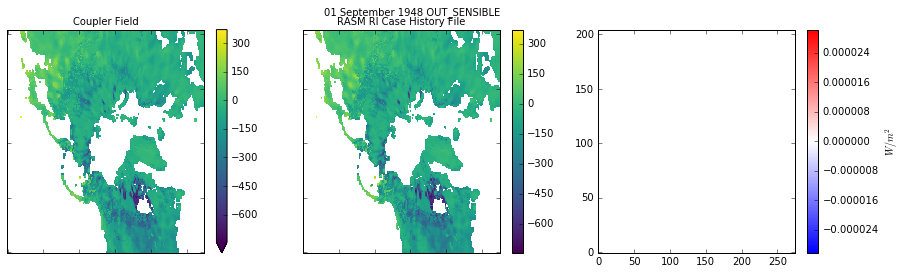

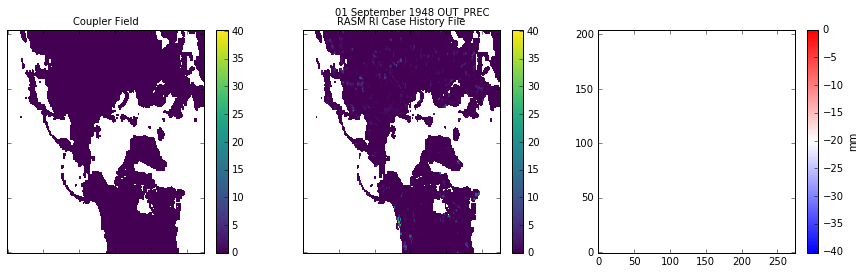

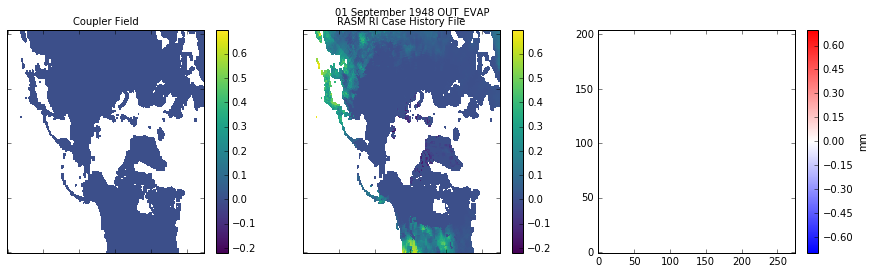

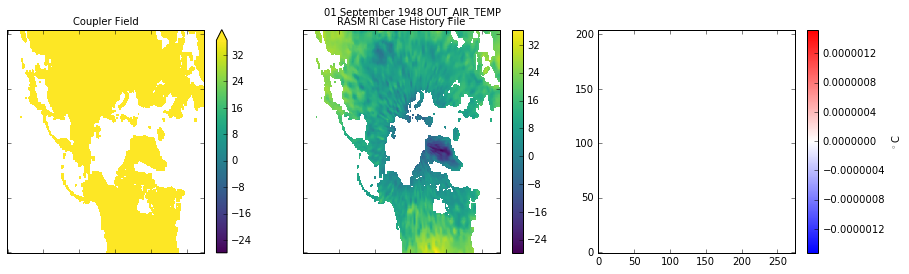

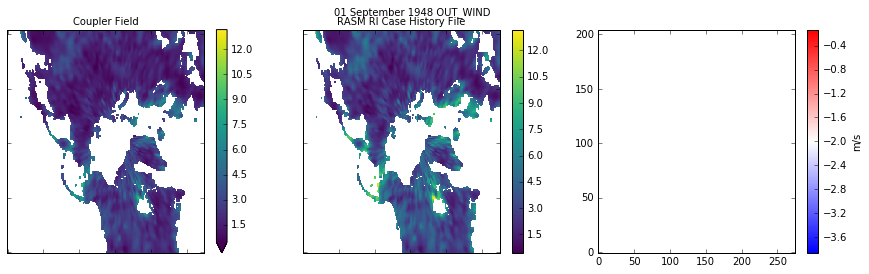

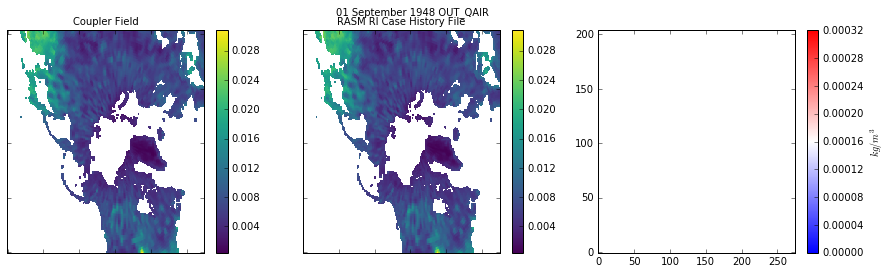

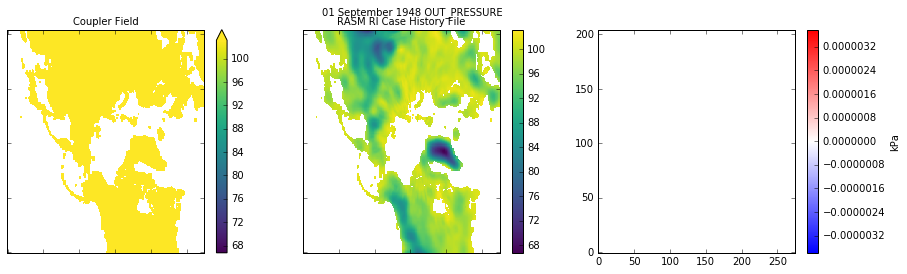

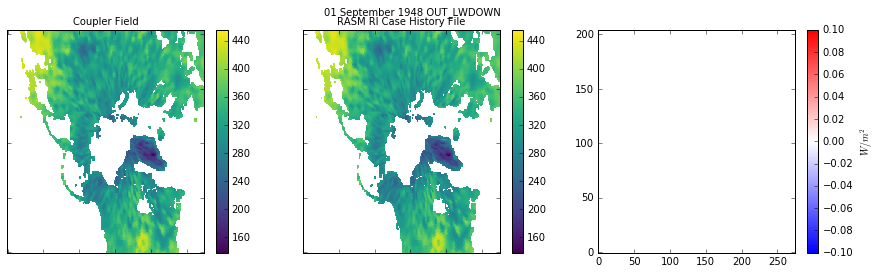

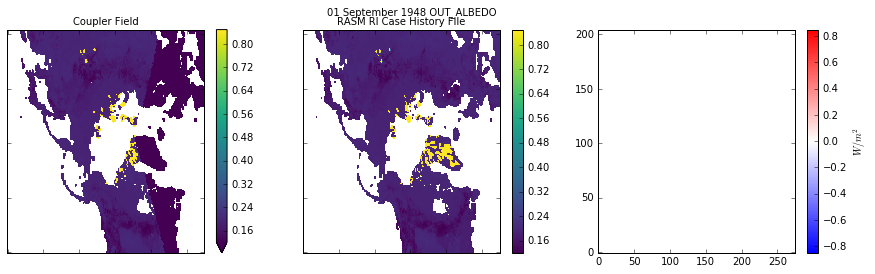

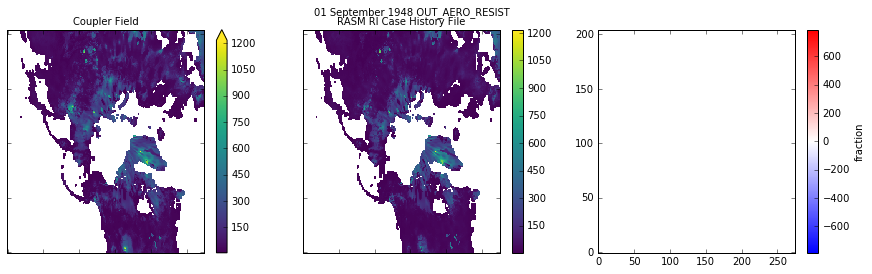

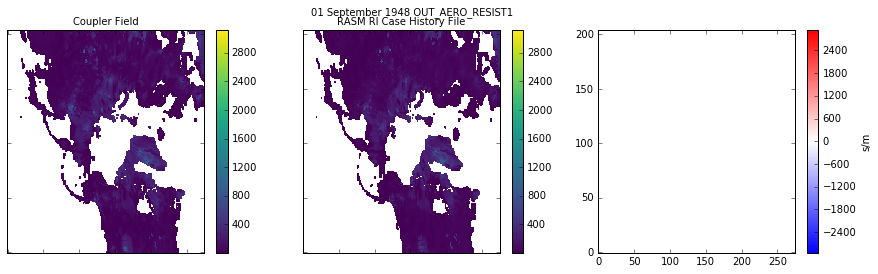

In [21]:
vars_to_plot = ['OUT_LATENT', 'OUT_SENSIBLE', 'OUT_PREC', 'OUT_EVAP','OUT_AIR_TEMP', 'OUT_WIND', 'OUT_QAIR', 
                'OUT_PRESSURE', 'OUT_LWDOWN', 'OUT_ALBEDO', 'OUT_AERO_RESIST', 'OUT_AERO_RESIST1']

coupler_vars_to_plot = ['l2x_Fall_lat', 'l2x_Fall_sen', 'x2l_Faxa_rainc', 'l2x_Fall_evap','x2l_Sa_tbot', 'x2l_Sa_u', 
                        'x2l_Sa_shum', 'x2l_Sa_pbot', 'x2l_Faxa_lwdn', 'l2x_Sl_avsdr', 'l2x_Sl_ram1', 'l2x_Sl_ram1']

units = ['$W/m^2$', '$W/m^2$', 'mm', 'mm', '$^\circ$C', 'm/s', '$kg/m^3$', 'kPa', '$W/m^2$', '$W/m^2$', 
         'fraction', 's/m', 's/m']

# days = np.arange(0,10)
days = np.arange(0,1)

dpi = 200
# loop over variables
fs = 10
j = 0
day = '01'
    
# process data
rasm = rasm11_output.isel(time=j)

for ind, var in enumerate(vars_to_plot): 

    fig, axs = plt.subplots(1,3, figsize=(15, 4))
    for i, axes in enumerate(axs.ravel()): 
        if i == 0: 
            if var == 'OUT_LATENT':
                vmin = -20
                vmax=40
            else:
                vmin = rasm[var].min()
                vmax = rasm[var].max()
            img = image[coupler_vars_to_plot[ind]].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
            axes.set_title('Coupler Field', size=fs)
            plt.setp(axes.get_xticklabels(), visible=False)
            plt.setp(axes.get_yticklabels(), visible=False)
        elif i == 1: 
            img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
            title = 'RASM RI Case History File'
            axes.set_title(title, size=fs)
            plt.setp(axes.get_xticklabels(), visible=False)
            plt.setp(axes.get_yticklabels(), visible=False)
        elif i == 2: 
            if var == 'OUT_PRESSURE':
                difference = image[coupler_vars_to_plot[ind]]*(1/1000) - rasm[var].to_masked_array()
            elif var == 'OUT_AIR_TEMP': 
                difference = (image[coupler_vars_to_plot[ind]] - 273.15) - rasm[var].to_masked_array()
            else: 
                difference = image[coupler_vars_to_plot[ind]] - rasm[var].to_masked_array()
            if var == 'OUT_VP':
                img = difference.plot(cmap='viridis', ax=axes, add_labels=False, add_colorbar=False)
            else: 
                img = difference.plot(cmap='bwr', ax=axes, add_labels=False, add_colorbar=False)
            cbar = plt.colorbar(img)
            cbar.set_label(units[ind])                             
            axes.set_title('RASM RI Coupler Field - RASM RI History File', size=fs)
            plt.setp(axes.get_xticklabels(), visible=False)
            plt.setp(axes.get_yticklabels(), visible=False)
        else: 
            print("%f should not be iterating to this value" % i)

    direc = os.path.join(workdir, 'plots', 'couplerfield_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day, var), size=fs)
    plotname = '%s-%s.png' %(day, var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')
    plt.cla()
    print("saved figure for %s" % var)

In [ ]:
vars_to_plot = ['OUT_LATENT', 'OUT_SENSIBLE', 'OUT_PREC', 'OUT_EVAP','OUT_AIR_TEMP', 'OUT_WIND', 'OUT_QAIR', 
                'OUT_PRESSURE', 'OUT_LWDOWN', 'OUT_ALBEDO', 'OUT_AERO_RESIST', 'OUT_AERO_RESIST1']

coupler_vars_to_plot = ['l2x_Fall_lat', 'l2x_Fall_sen', 'x2l_Faxa_rainc', 'l2x_Fall_evap','x2l_Sa_tbot', 'x2l_Sa_z', 
                        'x2l_Sa_shum', 'x2l_Sa_pbot', 'x2l_Faxa_lwdn', 'l2x_Sal_avsdr', 'l2x_Sl_ram1', 'l2x_Sl_ram1']

units = ['$W/m^2$', '$W/m^2$', 'mm', 'mm', '$^\circ$C', 'm/s', '$kg/m^3$', 'kPa', '$W/m^2$', '$W/m^2$', 
         'fraction', 's/m', 's/m']

In [ ]:
i = 0
ind = 0
j = 0
dpi = 200

hist_var = 'OUT_LATENT'
coupler_var = 'l2x_Fall_lat'
units = ['m/s']

fs = 10
day = 0

rasm = rasm11_output.isel(time=j)
    
image = image_driver

m = 1

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        vmin = image[coupler_var].min()
        vmax = image[coupler_var].max()
        img = image[coupler_var].plot(cmap='viridis', ax=axes, add_labels=False)
        axes.set_title('Coupler Field', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[coupler_var] - (rasm[var])
        img = (image[coupler_var] - rasm[var]).plot(cmap='bwr', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              )
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Coupler Field - History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)
        
    direc = os.path.join(workdir, 'plots', 'couplerfield_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day + 1, var), size=fs)
    plotname = '%s-%s.png' %(day + 1, hist_var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

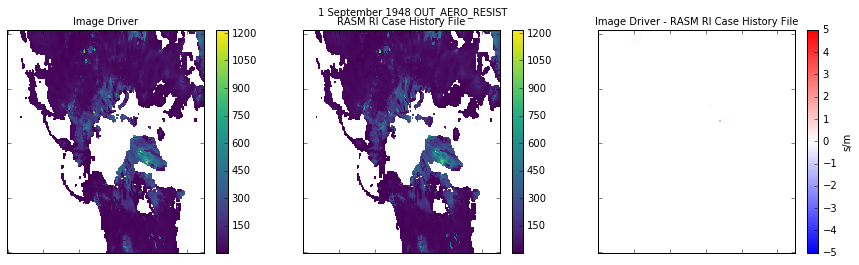

In [7]:
i = 0
ind = 0
j = 0
dpi = 200

var = 'OUT_AERO_RESIST'
units = ['s/m']

fs = 10
day = 0

rasm = rasm11_output.isel(time=j)
    
image = image_driver.isel(time=j)

m = 1

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        if var == 'OUT_RUNOFF':
            vmin = 0
            vmax = 5
        else: 
            vmin = image[var].min()
            vmax = image[var].max()
        vmin = -1
        vmax = 1
        img = image[var].plot(cmap='viridis', ax=axes, add_labels=False)
        axes.set_title('Image Driver', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[var] - (rasm[var])
        img = (image[var] - rasm[var]).plot(cmap='bwr', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              vmin=-5, vmax=5)
        image_minus_rasm.where(image_minus_rasm == 0).plot(cmap='gray_r', ax=axes, add_labels=False, 
                                                          add_colorbar=False)
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Image Driver - RASM RI Case History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)
        
    direc = os.path.join(workdir, 'plots', 'imagedriver_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day + 1, var), size=fs)
    plotname = '%s-%s.png' %(day + 1, var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

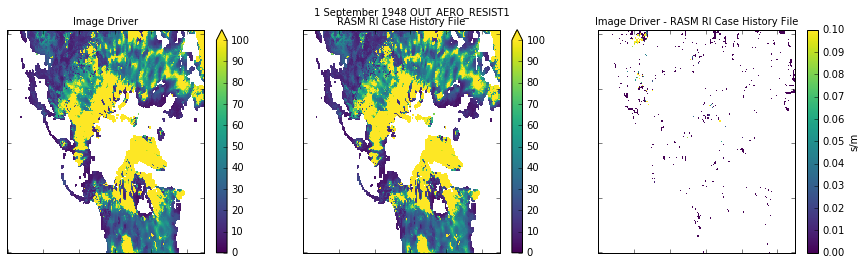

In [29]:
i = 0
ind = 0
j = 0
dpi = 200

var = 'OUT_AERO_RESIST1'
units = ['s/m']

fs = 10
day = 0

rasm = rasm11_output.isel(time=j)
    
image = image_driver.isel(time=j)

m = 1

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        if var == 'OUT_RUNOFF':
            vmin = 0
            vmax = 5
        else: 
            vmin = image[var].min()
            vmax = image[var].max()
        vmin = 0
        vmax = 100
        img = image[var].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
        axes.set_title('Image Driver', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[var] - (rasm[var])
        img = (image[var] - rasm[var]).plot(cmap='viridis', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              vmin=0, vmax=0.1)
        image_minus_rasm.where(image_minus_rasm == 0).plot(cmap='gray_r', ax=axes, add_labels=False, 
                                                          add_colorbar=False)
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Image Driver - RASM RI Case History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)
        
    direc = os.path.join(workdir, 'plots', 'imagedriver_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day + 1, var), size=fs)
    plotname = '%s-%s.png' %(day + 1, var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

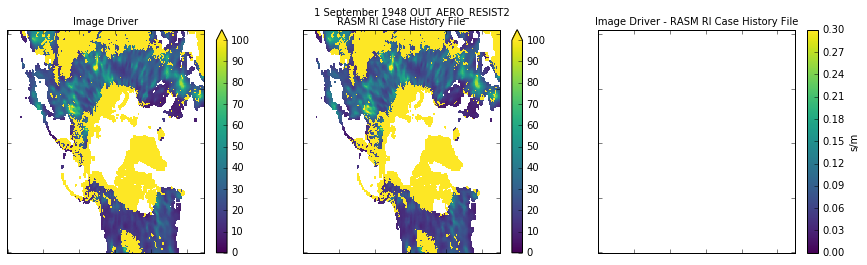

In [17]:
i = 0
ind = 0
j = 0
dpi = 200

var = 'OUT_AERO_RESIST2'
units = ['s/m']

fs = 10
day = 0

rasm = rasm11_output.isel(time=j)
    
image = image_driver.isel(time=j)

m = 1

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        if var == 'OUT_RUNOFF':
            vmin = 0
            vmax = 5
        else: 
            vmin = image[var].min()
            vmax = image[var].max()
        vmin = 0
        vmax = 100
        img = image[var].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
        axes.set_title('Image Driver', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[var] - (rasm[var])
        img = (image[var] - rasm[var]).plot(cmap='viridis', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              vmin=0, vmax=.3)
        image_minus_rasm.where(image_minus_rasm == 0).plot(cmap='gray_r', ax=axes, add_labels=False, 
                                                          add_colorbar=False)
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Image Driver - RASM RI Case History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)
        
    direc = os.path.join(workdir, 'plots', 'imagedriver_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day + 1, var), size=fs)
    plotname = '%s-%s.png' %(day + 1, var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

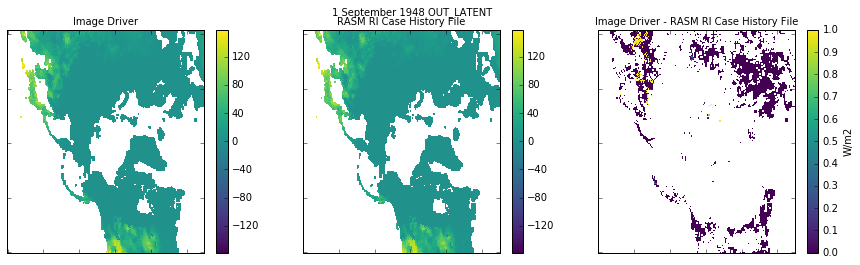

In [30]:
i = 0
ind = 0
j = 0
dpi = 200

var = 'OUT_LATENT'
units = ['W/m2']

fs = 10
day = 0

rasm = rasm11_output.isel(time=j)
    
image = image_driver.isel(time=j)

m = 1

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        if var == 'OUT_RUNOFF':
            vmin = 0
            vmax = 5
        else: 
            vmin = image[var].min()
            vmax = image[var].max()
        vmin = 0
        vmax = 100
        img = image[var].plot(cmap='viridis', ax=axes, add_labels=False)
        axes.set_title('Image Driver', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = rasm[var].plot(cmap='viridis', ax=axes, add_labels=False)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[var] - (rasm[var])
        img = (image[var] - rasm[var]).plot(cmap='viridis', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              vmin=0, vmax=1)
        image_minus_rasm.where(image_minus_rasm == 0).plot(cmap='gray_r', ax=axes, add_labels=False, 
                                                          add_colorbar=False)
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Image Driver - RASM RI Case History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)
        
    direc = os.path.join(workdir, 'plots', 'imagedriver_historyfile')
    os.makedirs(direc, exist_ok=True)
    fig.suptitle('%s September 1948 %s' % (day + 1, var), size=fs)
    plotname = '%s-%s.png' %(day + 1, var)
    savepath = os.path.join(direc, plotname)
    plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

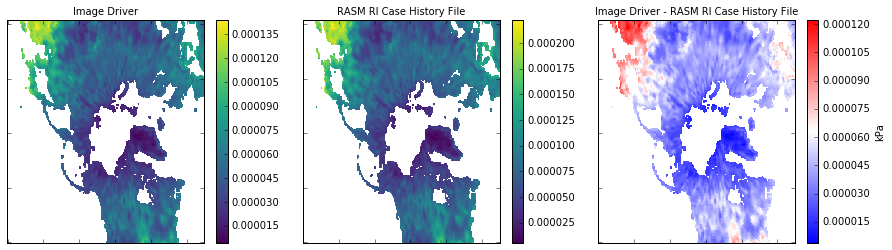

In [12]:
i = 0
ind = 0
j = 0

var = 'OUT_QAIR'
units = ['kPa']

fs = 10

rasm = rasm11_output.isel(time=j)
    
image = image_driver.isel(time=j)

m = 10

fig, axs = plt.subplots(1,3, figsize=(15, 4))
for i, axes in enumerate(axs.ravel()): 
    if i == 0: 
        if var == 'OUT_RUNOFF':
            vmin = 0
            vmax = 5
        else: 
            vmin = image[var].min()
            vmax = image[var].max()
        img = image[var].plot(cmap='viridis', ax=axes, add_labels=False)
        axes.set_title('Image Driver', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 1: 
        img = (rasm[var]*m).plot(cmap='viridis', ax=axes, add_labels=False)
        title = 'RASM RI Case History File'
        axes.set_title(title, size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    elif i == 2: 
        image_minus_rasm = image[var] - (rasm[var]*m)
        img = (image[var] - rasm[var]).plot(cmap='bwr', 
                                              ax=axes, 
                                              add_labels=False, 
                                              add_colorbar=False, 
                                              )
        '''image_minus_rasm.where(image_minus_rasm == 0).plot(cmap='Pastel2', ax=axes, add_labels=False, 
                                                          add_colorbar=False)'''
        cbar = plt.colorbar(img)
        cbar.set_label(units[ind])                             
        axes.set_title('Image Driver - RASM RI Case History File', size=fs)
        plt.setp(axes.get_xticklabels(), visible=False)
        plt.setp(axes.get_yticklabels(), visible=False)
    else: 
        print("%f should not be iterating to this value" % i)

In [31]:
sheffield_ri_file = 'sheffield.all.wr50a.1948.nc'
forcing_1948_ri = xr.open_dataset(os.path.join(workdir, 'imagemode_rasmri_historyfiles',
                                             sheffield_ri_file))

sheffield_image_file = 'sheffield_image_1948.nc'
forcing_1948_image = xr.open_dataset(os.path.join(workdir, 'imagemode_rasmri_historyfiles',
                                                 sheffield_image_file))

In [32]:
time0_ri = forcing_1948_ri.sel(time=slice('1948-09-01', '1948-09-02')).isel(time=0)

time0_image = forcing_1948_image.sel(time=slice('1948-09-01', '1948-09-02')).isel(time=0)

In [33]:
domain = xr.open_dataset(os.path.join('/Users/diana/Dropbox/UW/Research/rasm/rasm_project_meeting_oct2016/rasm_data_atm', 
                                     'domain.lnd.wr50a_ar9v4.130607.nc'))

In [39]:
time0_ri['pres']

<xarray.DataArray 'pres' (y: 205, x: 275)>
array([[ 101206.2734375,  101222.0390625,  101238.4921875, ...,
         101806.6640625,  101832.4375   ,  101849.625    ],
       [ 101188.5      ,  101203.625    ,  101220.2734375, ...,
         101795.6328125,  101827.8671875,  101842.6171875],
       [ 101169.2265625,  101183.6796875,  101199.6640625, ...,
         101786.3671875,  101823.09375  ,  101831.1875   ],
       ..., 
       [  99422.046875 ,   99535.5703125,   99669.4921875, ...,
          97012.09375  ,   96751.7890625,   96501.9140625],
       [  99244.9453125,   99357.1484375,   99476.34375  , ...,
          97097.5      ,   96836.921875 ,   96582.84375  ],
       [  99054.234375 ,   99152.4921875,   99258.9375   , ...,
          97175.890625 ,   96915.1328125,   96660.8046875]])
Coordinates:
    time     datetime64[ns] 1948-09-01
    xc       (y, x) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 190.4 ...
    yc       (y, x) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.

In [34]:
CONST_EPS = 18.016 / 28.97
q = time0_ri['shum']
p = time0_ri['pres'] / 1000
vp_ri = q * p / CONST_EPS

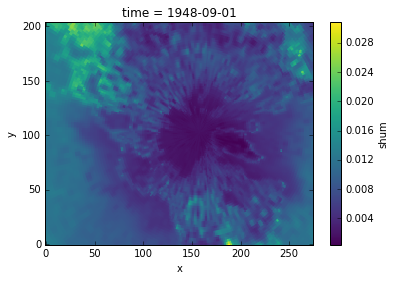

In [48]:
q.plot()

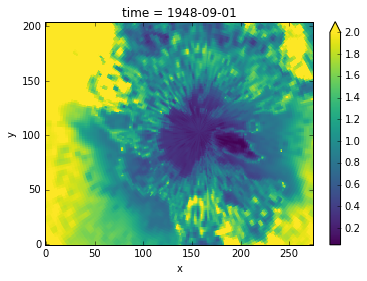

In [41]:
vp_ri.plot(vmax=2)

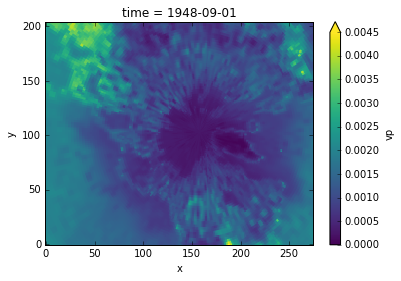

In [47]:
(time0_image['vp'] / 1000).plot(vmin=0, vmax=0.0045)

In [37]:
(time0_image['shum'] - q).max()

<xarray.DataArray 'shum' ()>
array(0.0)
Coordinates:
    time     datetime64[ns] 1948-09-01

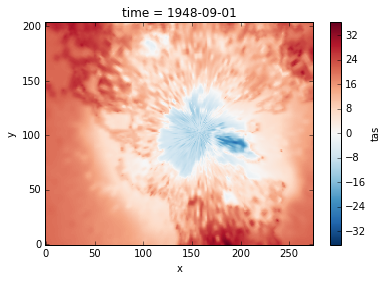

In [53]:
time0_image['tas'].plot() # kPa

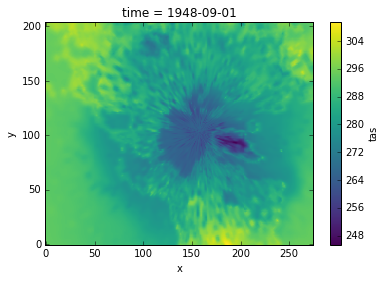

In [54]:
time0_ri['tas'].plot() # Pa